In [1]:
import numpy as np
from matplotlib import pyplot as plt

# plan of figures
# illustration of force/displacement curve for the device in multiple dimensions
# illustration of theoretical maximum (conservative) hopping performance as a function of stiffness and displacement

# but this isn't all...
# need a control policy to regulate system stiffness, preferably one that is model agnostic (if I have time)
# this would be an interesting advancement over prior works...

# what figure would this produce?
# plots of system stiffness over time for various ground stiffnesses?

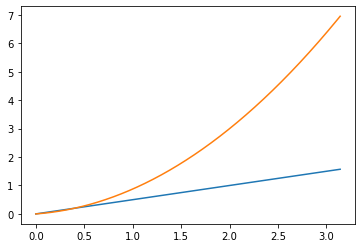

In [2]:
f = lambda y: (y**2+y)/(1+y)/2
y = np.arange(start=0,stop=np.pi,step=1e-3)
plt.plot(y,f(y))

g = lambda y: 1/2*f(y)**2+f(y)*y+1/2*f(y)
y = np.arange(start=0,stop=np.pi,step=1e-3)
plt.plot(y,g(y))

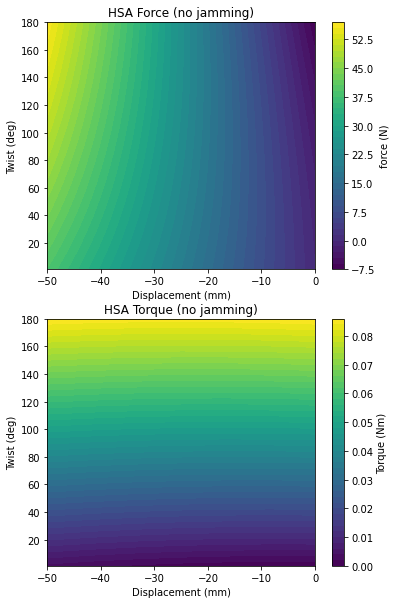

In [8]:
# we have an interesting model, but can we recreate some of the results in the characterization paper?

class HSA:

    def __init__(self,a,b,c,d,e):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.e = e

    def energy(self,x,t):
        return ((self.a+self.b*t)*x**2+x*(self.c*t**2+self.d*t)+self.e*t**2)/2

    def rest_length(self, t):
        return -(self.c*t**2+self.d*t)/2/(self.a+self.b*t)

    def rest_angle(self,x):
        return -(self.b*x**2+self.d*x)/2/(self.c*x+self.e)

    def blocked_force(self,t):
        x = self.rest_length(t)
        return -(self.c*t**2+self.d*t)/2-(self.a+self.b*t)*x

    def spring_constant(self,t):
        return self.a+self.b*t
    
    def hold_torque(self,t):
        x = self.rest_length(t)
        return -(self.b*x**2+self.d*x)/2-self.c*x*t-self.e*t

    def force(self,x,t):
        return -(self.a+self.b*t)*x-(self.c*t**2+self.d*t)/2

    def torque(self,x,t):
        return -(self.b*x**2+self.d*x)/2-(self.c*x+self.e)*t

hsa = HSA(0.7748,0.0028,3.306e-4,.0228,.477)
# hsa = HSA(0.47,0.0018,1.4e-5,0.0329,0.35)
# hsa = HSA(0.4339,7.16e-4,8.42e-5,.0194,0.2899)
fig,ax = plt.subplots(2,1,figsize=(6,10))
t = np.linspace(start=1.,stop=180,num=1000)
x = np.linspace(start=0.,stop=-50,num=7)
X,T = np.meshgrid(x,t)
Z = hsa.force(X,T)
contour = ax[0].contourf(X,T,Z,50)
plt.colorbar(contour, ax=ax[0],label="force (N)")
ax[0].set_xlabel("Displacement (mm)")
ax[0].set_ylabel("Twist (deg)")
ax[0].set_title("HSA Force (no jamming)")

Z = -hsa.torque(X,T)/1000
contour = ax[1].contourf(X,T,Z,50)
plt.colorbar(contour, ax=ax[1],label="Torque (Nm)")
ax[1].set_xlabel("Displacement (mm)")
ax[1].set_ylabel("Twist (deg)")
ax[1].set_title("HSA Torque (no jamming)")
plt.savefig("hsa force and torque")


Text(0.5, 1.0, 'HSA Torque (no jamming)')

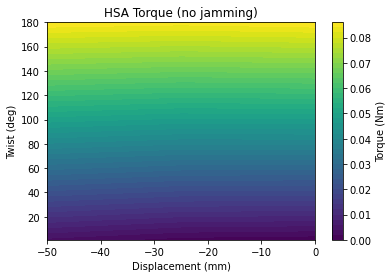

In [9]:
t = np.linspace(start=1.,stop=180,num=1000)
x = np.linspace(start=0.,stop=-50,num=3)
X,T = np.meshgrid(x,t)
Z = -hsa.torque(X,T)/1000
plt.contourf(X,T,Z,50)
plt.colorbar(label="Torque (Nm)")
plt.xlabel("Displacement (mm)")
plt.ylabel("Twist (deg)")
plt.title("HSA Torque (no jamming)")
# fig = plt.figure()
# ax = plt.axes()
# for _x in x:
#     ax.plot(t,hsa.torque(_x,t))
# plt.show()

Text(0.5, 1.0, 'HSA Torque Mechanical Advantage')

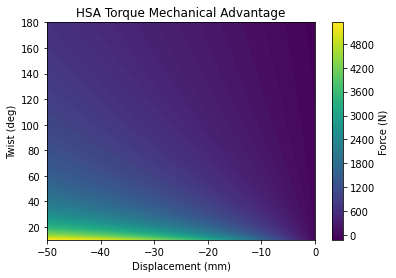

In [10]:
t = np.linspace(start=10,stop=180,num=171)
x = np.linspace(start=0,stop=-50,num=51)
X,T = np.meshgrid(x,t)
# np.shape(T)
# Z = (-hsa.force(X,T)+hsa.force(X,hsa.rest_angle(X))/(-hsa.torque(X,T)/1000))
Z = (hsa.force(X,T)/(-hsa.torque(X,T)/1000))
plt.contourf(X,T,Z,100)
plt.colorbar(label="Force (N)")
plt.xlabel("Displacement (mm)")
plt.ylabel("Twist (deg)")
plt.title("HSA Torque Mechanical Advantage")
# for _t in t:
#     plt.plot(x,-hsa.force(x,_t)+hsa.force(x,hsa.rest_angle(x))/(-hsa.torque(x,_t)/1000))

Text(0.5, 1.0, 'HSA Marginal Force from Twist')

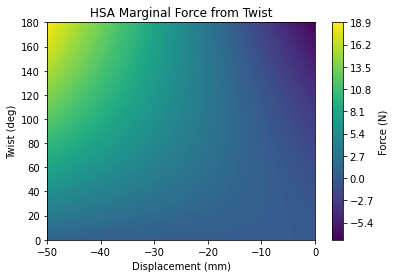

In [327]:
# t = np.linspace(start=0,stop=180,num=1000)
# x = np.linspace(start=0,stop=-50,num=1000)
# X,T = np.meshgrid(x,t)
# # np.shape(T)
# Z = (hsa.force(X,T)-hsa.force(X,hsa.rest_angle(X)))
# plt.contourf(X,T,Z,100)
# plt.colorbar(label="Force (N)")
# plt.xlabel("Displacement (mm)")
# plt.ylabel("Twist (deg)")
# plt.title("HSA Marginal Force from Twist")
# plt.plot(x,hsa.rest_angle(x))
# hsa.rest_angle(0)

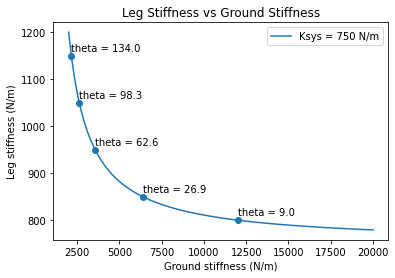

In [11]:
# ground stiffness vs. leg stiffness as function of system stiffness
import scipy.optimize
ksys = lambda kl,kg: 1/(1/kl+1/kg)
kg = np.linspace(start=2000,stop=20000,num=100)
kl = [scipy.optimize.bisect(lambda x: ksys(x,y)-750,1,2000) for y in kg]
plt.plot(kg,kl)
plt.ylabel("Leg stiffness (N/m)")
plt.xlabel("Ground stiffness (N/m)")
plt.legend(["Ksys = 750 N/m"])
plt.title("Leg Stiffness vs Ground Stiffness")
kl = [800,850,950,1050,1150]
kg = [scipy.optimize.bisect(lambda y: ksys(x,y)-750,1e-3,20000) for x in kl]
theta = [(k/1000-hsa.a)/hsa.b for k in kl]
annotations = ["theta = %.1f"%t for t in theta]
plt.scatter(kg,kl,)
for i,label in enumerate(annotations):
    plt.text(kg[i]+10,kl[i]+10,label)

def hsa_control(x,kl):
    # x in mm
    # kl in Newtons/mm
    c1 = hsa.c/2
    c2 = (hsa.b*x+hsa.d/2)
    c3 = hsa.a*x-kl*x
    return np.roots([c1,c2,c3])

plt.savefig("leg stiffness vs ground stiffness")

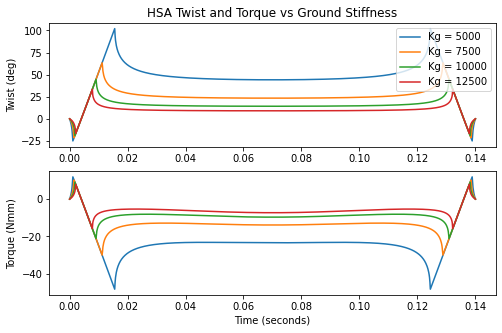

In [12]:
# hopping trajectory example

# stance phase trajectory for 5cm hopping
g = 9.81
E = .05*g
v = -np.sqrt(2*E)
kg = np.array([5000,7500,10000,12500])
kl = np.array([scipy.optimize.bisect(lambda x: ksys(x,kg)-750,1,2000) for kg in kg])
Ksys = 750

A = np.array([
    [0.,1.,0.],
    [-Ksys,0.,-g],
    [0.,0.,0.]
])
x0 = np.array([0.,v,1.])
flow = lambda t: (scipy.linalg.expm(A*t)@x0)[0]
tend = scipy.optimize.bisect(flow,0.05,.2)
tvec = np.linspace(start=0.,stop=tend,num=1000)
x = np.array([flow(t) for t in tvec])
theta = np.array([[np.real(hsa_control(1000*x,kl/1000))[1] for x in x] for kl in kl])
torque = np.array([[hsa.torque(1000*x[i],theta[j][i]) for i in range(len(tvec))] for j in range(np.shape(theta)[0])])

fig,ax = plt.subplots(2,1,figsize=(8,5))
for j in range(np.shape(theta)[0]):
    ax[0].plot(tvec,theta[j])
    ax[1].plot(tvec,torque[j])
ax[1].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Twist (deg)")
ax[1].set_ylabel("Torque (Nmm)")
ax[0].legend(["Kg = %d"%kg for kg in kg])
ax[0].set_title("HSA Twist and Torque vs Ground Stiffness")
plt.savefig("twist torque vs ground stiffness")

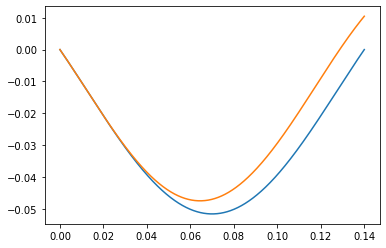

In [35]:
# hopping trajectory example

# stance phase trajectory for 5cm hopping
g = 9.81
E = .05*g
v = -np.sqrt(2*E)
kg = np.array([5000,7500,10000,12500])
kl = np.array([scipy.optimize.bisect(lambda x: ksys(x,kg)-750,1,2000) for kg in kg])
theta = np.array([(k/1000-hsa.a)/hsa.b for k in kl])
Ksys = 750

A = np.array([
    [0.,1.,0.],
    [-Ksys,0.,-g],
    [0.,0.,0.]
])
x0 = np.array([0.,v,1.])
flow = lambda t: (scipy.linalg.expm(A*t)@x0)[0]
tend = scipy.optimize.bisect(flow,0.05,.2)
tvec = np.linspace(start=0.,stop=tend,num=1000)
x_ideal = np.array([flow(t) for t in tvec])
f = lambda x,theta: np.array([x[1],-g+hsa.force(x[0]*1000,theta)])

def sim_euler(f,x0,tvec):
    x = np.zeros((2,len(tvec)))
    x[:,0] = x0[:]
    for i in range(1,len(tvec)):
        x[:,i] = x[:,i-1]+(tvec[i]-tvec[i-1])*f(x[:,i-1])
    return x

# foo = sim_euler(lambda x: f(x,theta[0]),x0[[0,1]],tvec)
# plt.plot(foo[0,:])
# f([-.01,0.],theta[0])

plt.plot(tvec,x_ideal)
foo = sim_euler(lambda x: f(x,theta[0]),x0[[0,1]],tvec)
plt.plot(tvec,foo[0,:])
# fig,ax = plt.subplots(2,1,figsize=(8,5))
# for j in range(np.shape(theta)[0]):
#     ax[0].plot(tvec,theta[j])
#     ax[1].plot(tvec,torque[j])
# ax[1].set_xlabel("Time (seconds)")
# ax[0].set_ylabel("Twist (deg)")
# ax[1].set_ylabel("Torque (Nmm)")
# ax[0].legend(["Kg = %d"%kg for kg in kg])
# ax[0].set_title("HSA Twist and Torque vs Ground Stiffness")
# plt.savefig("twist torque vs ground stiffness")

TypeError: Input z must be 2D, not 1D

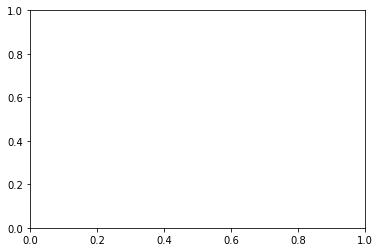

In [87]:

t = np.linspace(start=1.,stop=45,num=1000)
x = np.linspace(start=-20.,stop=-50,num=1000)
X,T = np.meshgrid(x,t)
# np.shape(T)
Z = (-hsa.force(X,T)+hsa.force(X,hsa.rest_angle(X)))/(hsa.torque(X,T)/1000)
plt.contourf(X,T,Z,10)
plt.colorbar(label="Advantage (1/m)")
plt.xlabel("Displacement (mm)")
plt.ylabel("Twist (deg)")
plt.title("HSA Torque Mechanical Advantage")